# Fluent Buyer Classification

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('CPAWallBuyers_Q3_2016.csv')

Variable | Description | Type of Variable
---| ---| ---
age | integer 13-116; 13 lowest and 116 highest | continuous
gender| male, female| categorical
state | denotes state of home address | categorical
esp | email service provider | categorical
vag | response to question; binary | categorical
val | response to question; binary | categorical
vas | response to question; binary | categorical
vaq | response to question; binary | categorical
v2m | “The 2016 Presidential Election is over. How do you identify politically?”; democrat, republican, or independent | categorical
CPAWallBuyer | Identifies buyers and non-buyers on CPA Wall; yes or no | categorical
count(0) | integer count of users that meet observations across other columns in the same row; 1 - 15 | continuous 

### I. Data Cleaning

In [3]:
data.head()

,age,gender,state,esp,vag,val,vas,vaq,v2m,CPAWallBuyer,count(0)
0,13,Male,DE,gmail.com,rent,no,no,no,independent,No,1.0
1,13,Male,MD,yahoo.com,rent,no,no,no,republican,No,1.0
2,15,Female,MN,gmail.com,rent,yes,no,no,democrat,No,1.0
3,15,Male,LA,gmail.com,rent,no,no,no,republican,No,1.0
4,16,Female,MD,verizon.net,own,TRUE,FALSE,yes,democrat,No,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54685 entries, 0 to 54684
Data columns (total 11 columns):
age             54685 non-null object
gender          54685 non-null object
state           54679 non-null object
esp             54685 non-null object
vag             54358 non-null object
val             54335 non-null object
vas             51828 non-null object
vaq             53943 non-null object
v2m             51951 non-null object
CPAWallBuyer    54682 non-null object
count(0)        54682 non-null float64
dtypes: float64(1), object(10)
memory usage: 4.6+ MB


In [5]:
data.rename(columns={'count(0)':'count'}, inplace= True) # Cleaner column title

In [6]:
data = data.dropna()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50086 entries, 0 to 54683
Data columns (total 11 columns):
age             50086 non-null object
gender          50086 non-null object
state           50086 non-null object
esp             50086 non-null object
vag             50086 non-null object
val             50086 non-null object
vas             50086 non-null object
vaq             50086 non-null object
v2m             50086 non-null object
CPAWallBuyer    50086 non-null object
count           50086 non-null float64
dtypes: float64(1), object(10)
memory usage: 4.6+ MB


In [8]:
data['age'] = data['age'].astype('int') # changing dtype
data['count'] = data['count'].astype('int')

In [9]:
#Changing dtypes to categorical
data['gender'] = pd.Categorical(data['gender'])
data['state'] = pd.Categorical(data['state'])
data['esp'] = pd.Categorical(data['esp'])
data['vag'] = pd.Categorical(data['vag'])
data['val'] = pd.Categorical(data['val'])
data['vas'] = pd.Categorical(data['vas'])
data['vaq'] = pd.Categorical(data['vaq'])
data['v2m'] = pd.Categorical(data['v2m'])
data['CPAWallBuyer'] = pd.Categorical(data['CPAWallBuyer'])

In [10]:
data.dtypes

age                int64
gender          category
state           category
esp             category
vag             category
val             category
vas             category
vaq             category
v2m             category
CPAWallBuyer    category
count              int64
dtype: object

In [11]:
#This code duplicates rows based on the count feature's value
data = data.loc[np.repeat(data.index.values,data['count'])]
data = data.drop('count',axis=1).reset_index(drop=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60151 entries, 0 to 60150
Data columns (total 10 columns):
age             60151 non-null int64
gender          60151 non-null category
state           60151 non-null category
esp             60151 non-null category
vag             60151 non-null category
val             60151 non-null category
vas             60151 non-null category
vaq             60151 non-null category
v2m             60151 non-null category
CPAWallBuyer    60151 non-null category
dtypes: category(9), int64(1)
memory usage: 1.0 MB


In [13]:
data['state'].value_counts().sort_values(ascending=False)

TX            5518
CA            5117
FL            4260
NY            3055
GA            2509
PA            2443
IL            2357
OH            2341
NC            2160
MI            1995
TN            1552
AL            1482
VA            1436
IN            1414
MO            1413
LA            1378
NJ            1282
SC            1196
AZ            1076
MD            1061
MS            1015
KY            1008
WI             972
MA             940
OK             934
WA             883
AR             857
CO             827
MN             762
CT             589
              ... 
Missouri         4
Louisiana        4
Kentucky         3
Pennsylvan       3
Virginia         3
Tennessee        3
Connecticu       2
Alabama          2
AP               2
New Jersey       2
Minnesota        2
Kansas           2
Georgia          1
Indiana          1
Illinois         1
Idaho            1
Maryland         1
[state]          1
Michigan         1
Mississipp       1
MISSING          1
GU          

In [14]:
# Removing rows with States length > 2
data = data[data['state'].str.len() <= 2]

In [15]:
data['state'].unique()

[DE, MD, MN, LA, CT, ..., --, AE, WL, AP, GU]
Length: 60
Categories (60, object): [DE, MD, MN, LA, ..., AE, WL, AP, GU]

In [16]:
# Checking why 60 unique States
pd.unique(data['state'].ravel())

array(['DE', 'MD', 'MN', 'LA', 'CT', 'GA', 'HI', 'IL', 'MA', 'NV', 'NY',
       'OH', 'OK', 'PA', 'SC', 'TN', 'TX', 'FL', 'KY', 'SD', 'VA', 'AK',
       'AL', 'AR', 'AZ', 'CA', 'CO', 'DC', 'IA', 'ID', 'IN', 'KS', 'ME',
       'MI', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'OR',
       'PR', 'RI', 'UT', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY', '5', 'XX',
       '--', 'AE', 'WL', 'AP', 'GU'], dtype=object)

In [17]:
#Assigning states & territories to regions
regions = [('state', ['AK', 'HI', 'AZ', 'NM', 'OK', 'TX',
                     'AL','AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV',
                     'CA','CO', 'ID', 'MT', 'NV', 'OR', 'UT', 'WA', 'WY',
                     'IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI',
                     'CT', 'DE', 'ME', 'MD', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT',
                     'AS', 'DC', 'FM', 'GU', 'MH', 'MP', 'PW', 'PR', 'VI', 'AE', 'AA', 'AP']),
           ('region', ['non_mainland','non_mainland','southwest','southwest','southwest','southwest',
                      'southeast', 'southeast', 'southeast', 'southeast', 'southeast', 'southeast', 'southeast',
                       'southeast', 'southeast', 'southeast', 'southeast', 'southeast',
                      'west', 'west', 'west', 'west', 'west', 'west', 'west', 'west', 'west',
                      'midwest','midwest','midwest','midwest','midwest','midwest','midwest','midwest','midwest',
                       'midwest','midwest','midwest',
                      'northeast','northeast','northeast','northeast','northeast','northeast','northeast','northeast',
                       'northeast','northeast','northeast',
                      'territory','territory','territory','territory','territory','territory','territory','territory',
                       'territory','territory','territory','territory'])]

In [18]:
# Removing States not in state/territory list
data = data[data['state'] != 'WL']
data = data[data['state'] != '5']
data = data[data['state'] != 'XX']
data = data[data['state'] != '--']

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60030 entries, 0 to 60150
Data columns (total 10 columns):
age             60030 non-null int64
gender          60030 non-null category
state           60030 non-null category
esp             60030 non-null category
vag             60030 non-null category
val             60030 non-null category
vas             60030 non-null category
vaq             60030 non-null category
v2m             60030 non-null category
CPAWallBuyer    60030 non-null category
dtypes: category(9), int64(1)
memory usage: 1.5 MB


In [20]:
data['state'].unique() #Includes territories so state has 56 unique values

[DE, MD, MN, LA, CT, ..., WV, WY, AE, AP, GU]
Length: 56
Categories (56, object): [DE, MD, MN, LA, ..., WY, AE, AP, GU]

In [21]:
#Creating new region feature based on state; do not want to get 55 dummy variables for state feature
regions = pd.DataFrame.from_items(regions)
data = data.merge(regions, left_on='state', right_on='state', how='right')
data = data.dropna()

In [22]:
data['region'].value_counts()

southeast       19306
midwest         12864
northeast       10253
west             8869
southwest        7959
non_mainland      397
territory         382
Name: region, dtype: int64

In [23]:
data['esp'].value_counts()

gmail.com               32759
yahoo.com               16211
hotmail.com              2512
aol.com                  2342
icloud.com                671
comcast.net               563
outlook.com               450
att.net                   437
live.com                  399
ymail.com                 362
msn.com                   325
sbcglobal.net             234
verizon.net               185
bellsouth.net             159
rocketmail.com            133
cox.net                   132
charter.net               100
me.com                     72
mail.com                   69
frontier.com               46
windstream.net             40
email.com                  36
optonline.net              36
juno.com                   33
roadrunner.com             30
centurylink.net            27
earthlink.net              27
embarqmail.com             25
aim.com                    25
netzero.net                23
                        ...  
zepsa.com                   1
goldringgulf.com            1
bristolcc.

In [24]:
#Noticed a few esp finishing in .net
data['esp'].str.contains('.net').sum()

2336

In [25]:
#Creating new esp_group feature based on esp
#Do not want to get over 1000 dummy variables for esp feature
data['esp_group']= 'gmail.com'

In [26]:
data['esp_group'][(data['esp']!= 'yahoo.com')|(data['esp']!= 'gmail.com')|
                  (data['esp']!= 'hotmail.com')|(data['esp'].str.contains('.net'))] = 'other' 
data['esp_group'][data['esp']=='gmail.com'] = 'gmail' 
data['esp_group'][data['esp']=='yahoo.com'] = 'yahoo' 
data['esp_group'][data['esp']=='aol.com'] = 'aol' 
data['esp_group'][data['esp']=='hotmail.com'] = 'hotmail' 
data['esp_group'][data['esp'].str.contains('.net')] = '.net' 

/Users/otaveras/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/otaveras/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/otaveras/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/otaveras/anaconda/lib/python2.7/site-packages/ip

In [27]:
# Confirmed with tech team that responses to survey questions are 
# saved as binary; will change responses to 1 or 0

In [27]:
data['vaq'].unique()

array(['no', 'yes', 'FALSE', 'TRUE', 'diabetes'], dtype=object)

In [28]:
data['vaq'].replace(to_replace= 'TRUE', value = 1, inplace = True)
data['vaq'].replace(to_replace= 'diabetes', value = 1, inplace = True)
data['vaq'].replace(to_replace= 'yes', value = 1, inplace = True)
data['vaq'].replace(to_replace= 'FALSE', value = 0, inplace = True)
data['vaq'].replace(to_replace= 'no', value = 0, inplace = True)

In [29]:
data['val'].unique()

array(['no', 'yes', 'FALSE', 'TRUE', 'own'], dtype=object)

In [30]:
data['val'].replace(to_replace= 'TRUE', value = 1, inplace = True)
data['val'].replace(to_replace= 'own', value = 1, inplace = True)
data['val'].replace(to_replace= 'yes', value = 1, inplace = True)
data['val'].replace(to_replace= 'FALSE', value = 0, inplace = True)
data['val'].replace(to_replace= 'no', value = 0, inplace = True)

In [31]:
data['vas'].unique()

array(['no', 'yes', 'FALSE', 'TRUE', 'arthritis'], dtype=object)

In [32]:
data['vas'].replace(to_replace= 'TRUE', value = 1, inplace = True)
data['vas'].replace(to_replace= 'arthritis', value = 1, inplace = True)
data['vas'].replace(to_replace= 'yes', value = 1, inplace = True)
data['vas'].replace(to_replace= 'FALSE', value = 0, inplace = True)
data['vas'].replace(to_replace= 'no', value = 0, inplace = True)

In [33]:
data['vag'].unique()

array(['rent', 'own', 'FALSE', 'TRUE', 'iownmyhome'], dtype=object)

In [34]:
data['vag'].replace(to_replace= 'TRUE', value = 1, inplace = True)
data['vag'].replace(to_replace= 'iownmyhome', value = 1, inplace = True)
data['vag'].replace(to_replace= 'own', value = 1, inplace = True)
data['vag'].replace(to_replace= 'FALSE', value = 0, inplace = True)
data['vag'].replace(to_replace= 'rent', value = 0, inplace = True)

In [35]:
data['CPAWallBuyer'].unique()

array(['No', 'Yes'], dtype=object)

In [36]:
data['CPAWallBuyer'].replace(to_replace= 'Yes', value = 1, inplace = True)
data['CPAWallBuyer'].replace(to_replace= 'No', value = 0, inplace = True)

In [37]:
data.sample(10)

,age,gender,state,esp,vag,val,vas,vaq,v2m,CPAWallBuyer,region,esp_group
15019,48.0,Male,OH,hotmail.com,0,1,1,1,independent,0,midwest,hotmail
30463,54.0,Female,FL,gmail.com,1,1,0,0,democrat,0,southeast,gmail
38669,23.0,Male,CA,gmail.com,1,0,0,0,democrat,0,west,gmail
1627,44.0,Female,MN,gmail.com,0,1,1,0,republican,0,midwest,gmail
3628,39.0,Female,CT,gmail.com,0,1,0,0,republican,0,northeast,gmail
41784,55.0,Female,CA,gmail.com,1,1,1,0,democrat,0,west,gmail
22656,22.0,Female,TX,gmail.com,0,0,0,1,independent,0,southwest,gmail
17050,20.0,Male,PA,yahoo.com,0,0,0,0,independent,0,northeast,yahoo
46128,58.0,Male,IN,gmail.com,0,0,1,0,independent,0,midwest,gmail
32436,47.0,Female,KY,gmail.com,0,1,0,0,democrat,0,southeast,gmail


In [38]:
data.describe()

,age,vag,val,vas,vaq,CPAWallBuyer
count,60030.000000,60030.000000,60030.000000,60030.000000,60030.000000,60030.000000
mean,43.218291,0.325271,0.597884,0.226087,0.149175,0.015442
std,16.272870,0.468480,0.490329,0.418300,0.356264,0.123305
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,116.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### II. Exploratory Data Analysis

#### a. Probability of a Buyer

In [176]:
data[data['CPAWallBuyer']==1]['CPAWallBuyer'].sum() #Ttl converted users

927

In [177]:
data[data['CPAWallBuyer']==0]['CPAWallBuyer'].count() #Ttl of non-converters

59095

In [178]:
927.0/(927+59103) #Conversion rate; imbalanced data set

0.015442278860569715

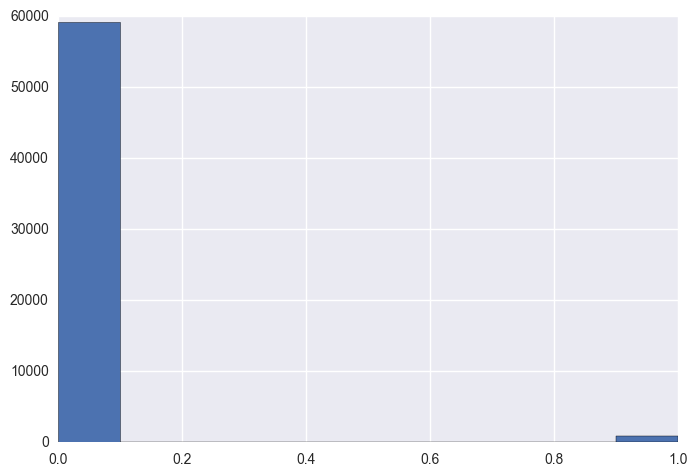

In [183]:
plt.hist(data['CPAWallBuyer']);

#### b. Frequency Tables

In [42]:
buyer_sum = data.groupby(['CPAWallBuyer'])
buyer_sum['age'].value_counts(ascending=True) #ascending=True because I want to see the ages with highest number of buyers

CPAWallBuyer  age  
0             16.0       1
              101.0      1
              102.0      1
              116.0      1
              13.0       2
              15.0       2
              94.0      10
              97.0      10
              93.0      12
              95.0      13
              96.0      24
              17.0      25
              92.0      34
              88.0      39
              90.0      50
              87.0      58
              85.0      61
              89.0      64
              84.0      72
              86.0      72
              82.0      77
              83.0      79
              81.0      88
              79.0     121
              80.0     126
              78.0     141
              77.0     157
              76.0     195
              91.0     210
              74.0     225
                      ... 
1             50.0      15
              54.0      15
              45.0      16
              19.0      17
              46.0      17
        

In [43]:
#Removing age outliers
data = data[(data['age']<101) & (data['age']>16)]

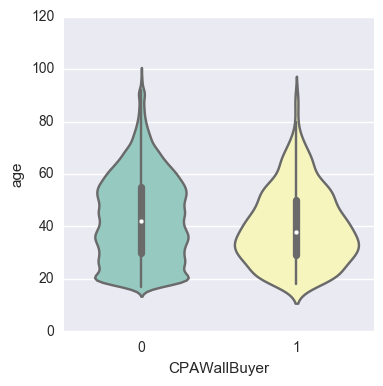

In [73]:
sns.factorplot(x= 'CPAWallBuyer', y= 'age', data=data, kind='violin', palette='Set3');

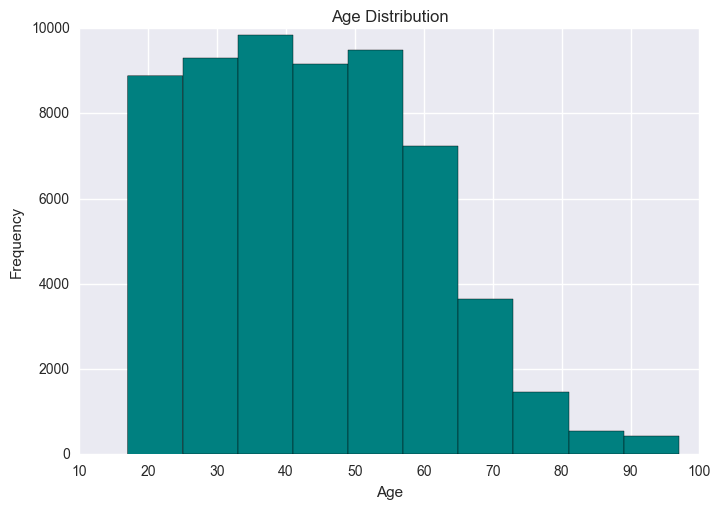

In [74]:
plt.hist(data['age'], color= 'teal')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution');

Age is right-skewed distribution

In [44]:
buyer_sum['gender'].value_counts()

CPAWallBuyer  gender
0             Female    35257
              Male      23846
1             Female      622
              Male        305
Name: gender, dtype: int64

In [45]:
622.0/35254 #Female conversion odds

0.0176433879843422

In [46]:
305.0/23841 #Male conversion odds

0.0127930875382744

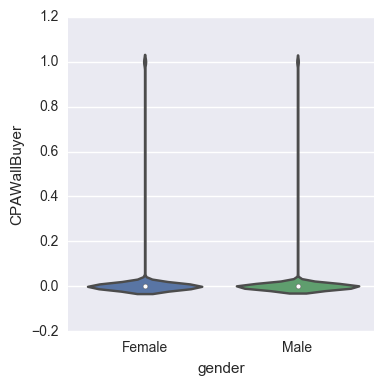

In [48]:
sns.factorplot(x= 'gender', y='CPAWallBuyer', data=data, kind='violin');

In [49]:
buyer_sum['state'].value_counts(ascending=True)

CPAWallBuyer  state
0             GU         1
              AP         2
              AE         6
              VI         6
              WY        97
              VT        98
              ND       115
              SD       133
              MT       151
              PR       151
              AK       164
              RI       171
              NH       181
              DE       185
              DC       210
              HI       227
              ME       234
              ID       253
              NE       259
              UT       399
              NM       423
              WV       442
              NV       523
              KS       526
              IA       540
              OR       570
              CT       579
              MN       749
              CO       817
              AR       826
                      ... 
1             NJ        11
              NV        11
              WV        11
              UT        12
              KY        13
        

In [50]:
#Removing region outliers
data = data[(data['region']!='VI') | (data['region']!='AE') | (data['region']!='AP') | (data['region']!='GU')]

In [51]:
buyer_sum['region'].value_counts()

CPAWallBuyer  region      
0             southeast       18973
              midwest         12681
              northeast       10131
              west             8728
              southwest        7823
              non_mainland      391
              territory         376
1             southeast         333
              midwest           183
              west              141
              southwest         136
              northeast         122
              non_mainland        6
              territory           6
Name: region, dtype: int64

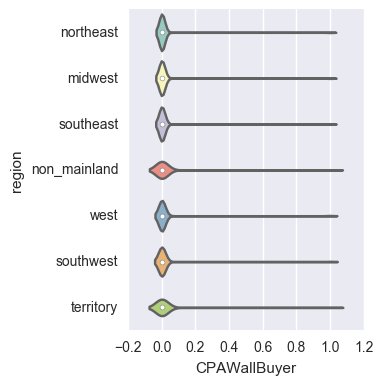

In [184]:
sns.factorplot(x= 'CPAWallBuyer', y= 'region', data=data, kind='violin', palette='Set3');

In [76]:
333.0/18972 #southeast conversion odds

0.017552182163187855

In [77]:
183.0/12679 #midwest conversion odds

0.014433314930199543

In [78]:
141.0/8728 #west conversion odds

0.016154903758020166

In [79]:
136.0/7821 #southwest conversion odds

0.01738908068021992

In [80]:
122.0/10128 #northeast conversion odds

0.012045813586097947

In [81]:
6.0/391 #non_mainland conversion odds

0.015345268542199489

In [82]:
6.0/376 #territory conversion odds

0.015957446808510637

In [83]:
buyer_sum['esp'].value_counts(ascending=False)

CPAWallBuyer  esp                   
0             gmail.com                 32170
              yahoo.com                 16013
              hotmail.com                2477
              aol.com                    2316
              icloud.com                  663
              comcast.net                 558
              outlook.com                 435
              att.net                     430
              live.com                    395
              ymail.com                   359
              msn.com                     322
              sbcglobal.net               234
              verizon.net                 185
              bellsouth.net               157
              rocketmail.com              133
              cox.net                     131
              charter.net                  96
              me.com                       70
              mail.com                     69
              frontier.com                 46
              windstream.net               

In [84]:
buyer_sum['esp_group'].value_counts()

CPAWallBuyer  esp_group
0             gmail        32170
              yahoo        16013
              other         3816
              hotmail       2477
              aol           2316
              .net          2311
1             gmail          589
              yahoo          198
              other           54
              hotmail         35
              aol             26
              .net            25
Name: esp_group, dtype: int64

In [189]:
frame = buyer_sum['esp_group'].value_counts()
frame = pd.DataFrame(frame)
frame

esp_group
CPAWallBuyer esp_group           
0            gmail          32170
             yahoo          16013
             other           3816
             hotmail         2477
             aol             2316
             .net            2311
1            gmail            589
             yahoo            198
             other             54
             hotmail           35
             aol               26
             .net              25

In [85]:
589.0/32164 #gmail conversion odds

0.01831239895535381

In [86]:
198.0/16012 #yahoo conversion odds

0.01236572570572071

In [87]:
54.0/3816 #other conversion odds

0.014150943396226415

In [88]:
35.0/2477 #hotmail conversion odds

0.014129995962858296

In [89]:
26.0/2316 #aol conversion odds

0.011226252158894647

In [90]:
buyer_sum['vag'].value_counts()

CPAWallBuyer  vag
0             0      39809
              1      19294
1             0        695
              1        232
Name: vag, dtype: int64

In [91]:
232.0/19292 # home owner conversion odds

0.012025710138917687

In [92]:
buyer_sum['val'].value_counts()

CPAWallBuyer  val
0             1      35392
              0      23711
1             1        499
              0        428
Name: val, dtype: int64

In [93]:
499.0/35389 # Car owner conversion odds

0.014100426686258442

In [94]:
buyer_sum['vas'].value_counts()

CPAWallBuyer  vas
0             0      45716
              1      13387
1             0        742
              1        185
Name: vas, dtype: int64

In [95]:
buyer_sum['vaq'].value_counts()

CPAWallBuyer  vaq
0             0      50231
              1       8872
1             0        844
              1         83
Name: vaq, dtype: int64

In [96]:
83.0/8870 # Diabetic conversion odds

0.00935738444193912

In [97]:
buyer_gender = data.groupby(['gender', 'CPAWallBuyer'])
buyer_gender['age'].value_counts(ascending=True)

gender  CPAWallBuyer  age 
Female  0             97.0      2
                      94.0      3
                      95.0      4
                      96.0      4
                      93.0      6
                      92.0      9
                      17.0     15
                      89.0     16
                      90.0     17
                      84.0     19
                      87.0     19
                      88.0     19
                      86.0     25
                      85.0     27
                      82.0     34
                      81.0     36
                      83.0     41
                      80.0     65
                      91.0     72
                      79.0     76
                      78.0     79
                      77.0     94
                      76.0    113
                      74.0    129
                      75.0    152
                      71.0    162
                      73.0    168
                      72.0    175
                     

In [98]:
data.corr()

,age,vag,val,vas,vaq,CPAWallBuyer
age,1.000000,0.280236,0.215815,0.074370,0.027692,-0.025515
vag,0.280236,1.000000,0.358396,0.085039,0.078739,-0.020054
val,0.215815,0.358396,1.000000,0.116165,0.085353,-0.015229
vas,0.074370,0.085039,0.116165,1.000000,0.293309,-0.007949
vaq,0.027692,0.078739,0.085353,0.293309,1.000000,-0.020963
CPAWallBuyer,-0.025515,-0.020054,-0.015229,-0.007949,-0.020963,1.000000


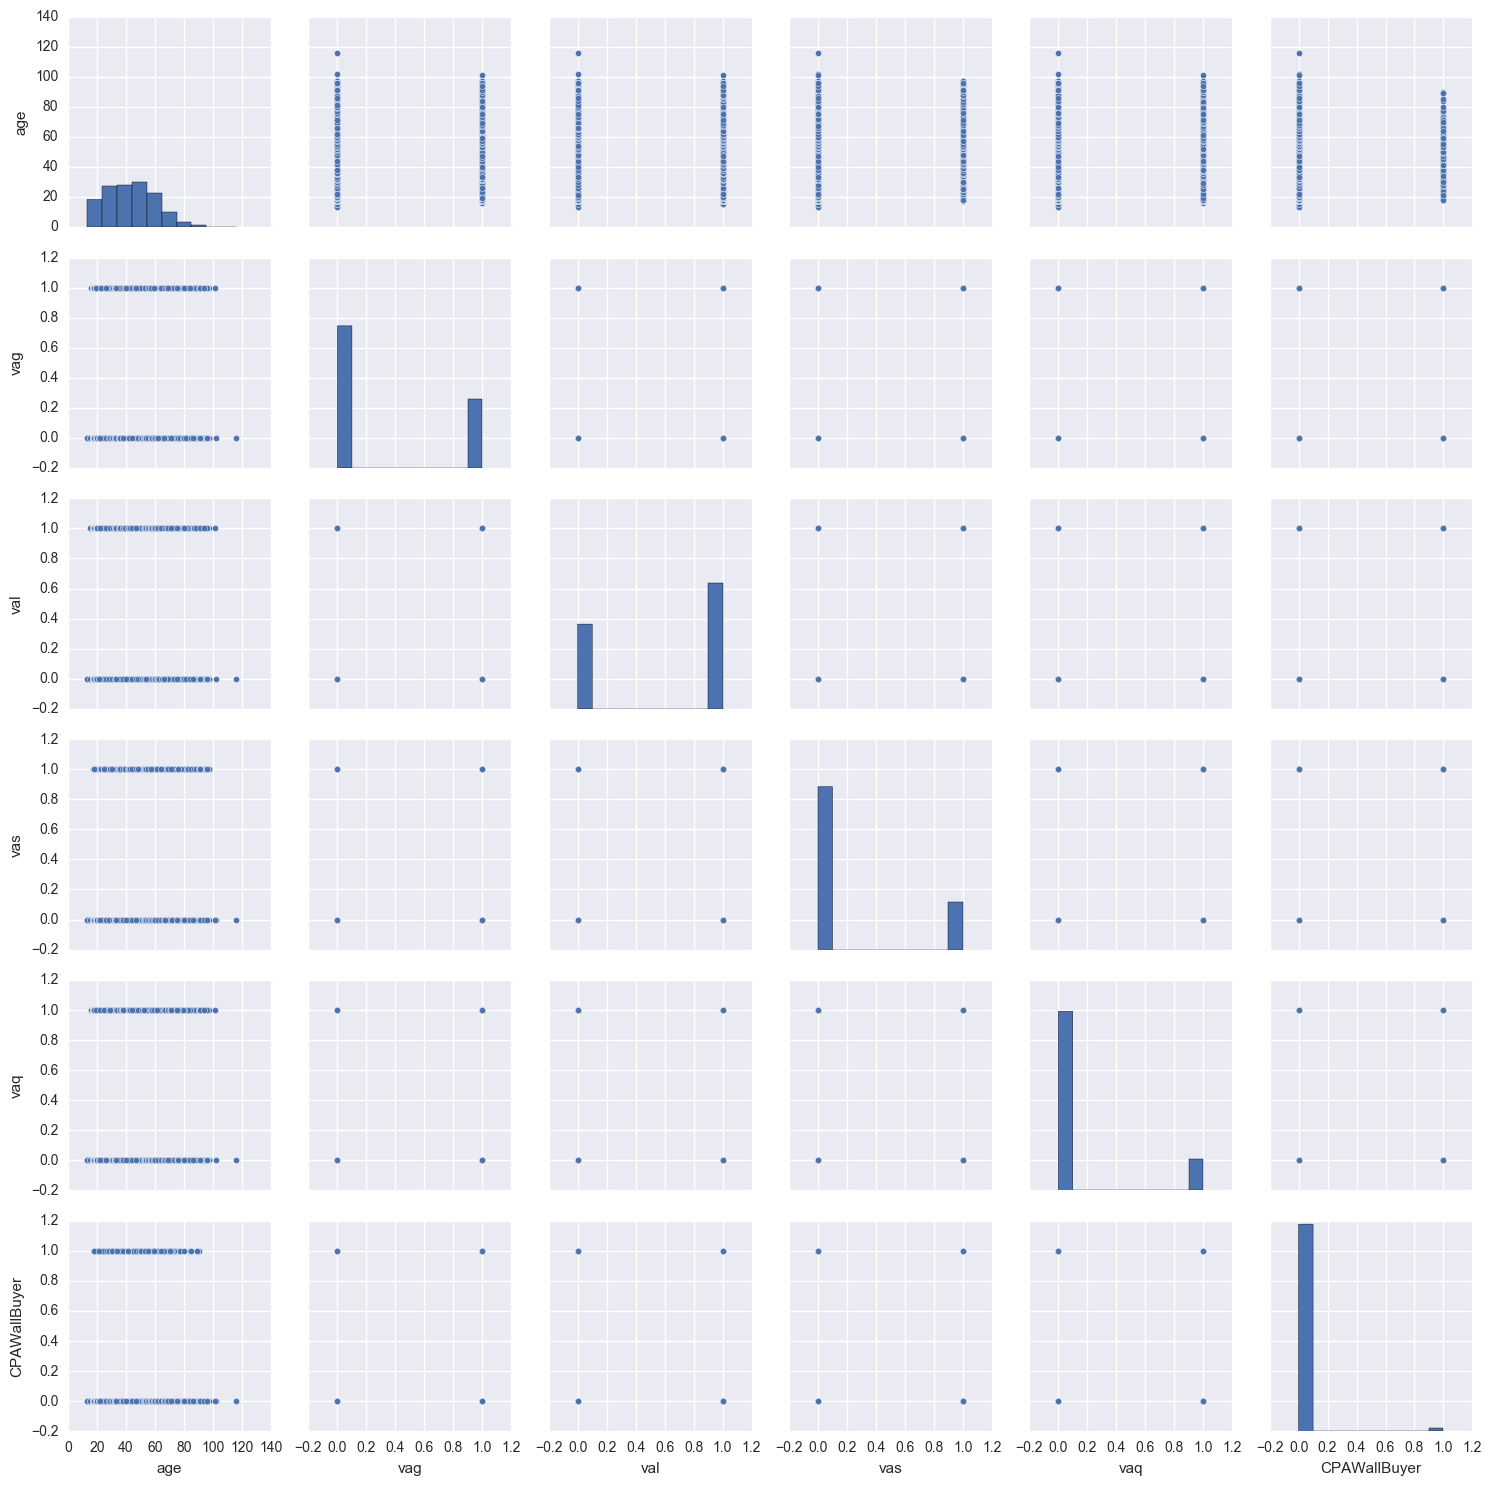

In [71]:
sns.pairplot(data);

#### d. Exploratory Data Analysis Summary
- Based on the dataset, the probability that a user buys something from the CPA Wall is ~1.5%; this makes the dataset very imbalanced.
- Age seems to be a good indicator for whether or not a user bought something. From the violin plots, it looks like a good amount of buyers are age 20-40
- Female conversion odds are higher than Male conversion odds.
- Southeast, southwest, and west are the regions that have the highest conversion odds.
- gmail is the esp group with the highest conversion odds.

### III. Feature Engineering

Need to one-hot encode region, v2m, gender, and esp_group to have machine-legible dataset

In [99]:
data2 = data.copy() #Not yet machine-legible

In [100]:
df2 = pd.get_dummies(data2['region'], prefix= 'region', drop_first= True)
data2 = data2.join(df2)

In [101]:
df3 = pd.get_dummies(data2['v2m'], prefix= 'v2m', drop_first= True)
data2 = data2.join(df3)

In [102]:
df4 = pd.get_dummies(data2['gender'], prefix= 'gender', drop_first= True)
data2 = data2.join(df4)

In [103]:
df5 = pd.get_dummies(data2['esp_group'], prefix= 'esp_group', drop_first= True)
data2 = data2.join(df5)

In [104]:
data2 = data2.drop('esp', axis= 1)
data2 = data2.drop('esp_group', axis= 1)
data2 = data2.drop('state', axis= 1)
data2 = data2.drop('region', axis= 1)
data2 = data2.drop('v2m', axis= 1)
data2 = data2.drop('gender', axis= 1)

In [105]:
data2 = data2.dropna()

In [106]:
data2 #Machine-legible

,age,vag,val,vas,vaq,CPAWallBuyer,region_non_mainland,region_northeast,region_southeast,region_southwest,region_territory,region_west,v2m_independent,v2m_republican,gender_Male,esp_group_aol,esp_group_gmail,esp_group_hotmail,esp_group_other,esp_group_yahoo
1,18.0,0,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,18.0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,18.0,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,18.0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
5,18.0,0,0,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,18.0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,19.0,1,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,19.0,0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,19.0,0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
10,19.0,0,1,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


### IV. Modelling

#### a. Kitchen-sink strategy

- Will start out by putting in all the features into the model
- Since 1.5% probability of a user being a buyer, need model to be above 98.5% accuracy

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sk_modelcurves.learning_curve import draw_learning_curve

In [108]:
X= data2.drop('CPAWallBuyer', axis=1)
y= data2['CPAWallBuyer']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [110]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

In [111]:
parameters = {'max_features': ('auto', 'sqrt', 'log2')}
model = RandomForestClassifier()
clf = GridSearchCV(model, parameters, cv=cv)

In [112]:
clf.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': ('auto', 'sqrt', 'log2')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [113]:
clf.best_params_

{'max_features': 'log2'}

In [114]:
best_model = clf.best_estimator_

In [115]:
best_model.score(X_train, y_train)

0.98782655055980095

In [116]:
best_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [175]:
#Will use f1 score, mean of precision and recall, due to imbalanced dataset
scores = cross_val_score(best_model, X_train, y_train, cv=10, scoring= 'f1')
print('CV accuracy {}, Average accuracy {}'.format(scores, scores.mean()))

CV accuracy [ 0.11320755  0.10526316  0.08080808  0.125       0.12631579  0.12371134
  0.19607843  0.14583333  0.19148936  0.1       ], Average accuracy 0.130770704196


In [206]:
cv = range(1,11)
cross_val = pd.DataFrame({'F1 score': scores, 'Folds': cv})

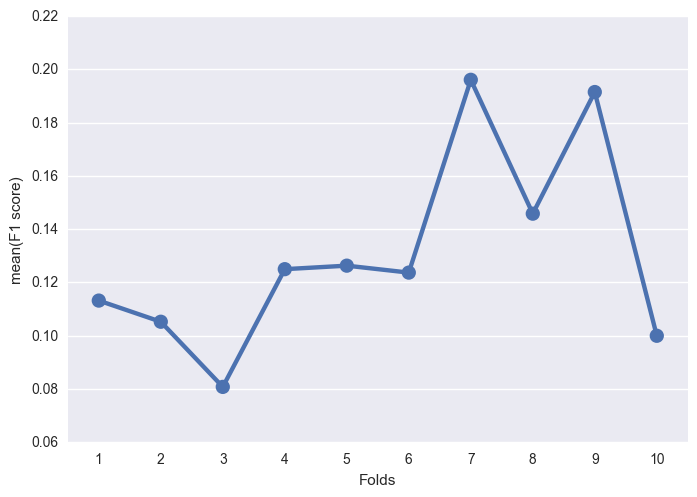

In [207]:
sns.pointplot(x= 'Folds', y= 'F1 score', data=cross_val);

In [118]:
y_predict = best_model.predict(X_train)
f1_score(y_train, y_predict)

0.47347740667976418

In [119]:
y1_predict = best_model.predict(X_test)
f1_score(y_test, y1_predict)

0.18505338078291816

In [120]:
best_model.score(X_test, y_test)

0.98473943755831006

In [121]:
features = X.columns
feature_importances = best_model.feature_importances_
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)
features_df

,Features,Importance Score
0,age,0.574786
3,vas,0.049863
2,val,0.045931
13,gender_Male,0.042454
7,region_southeast,0.035327
12,v2m_republican,0.034021
11,v2m_independent,0.033741
1,vag,0.031916
10,region_west,0.027622
4,vaq,0.025022


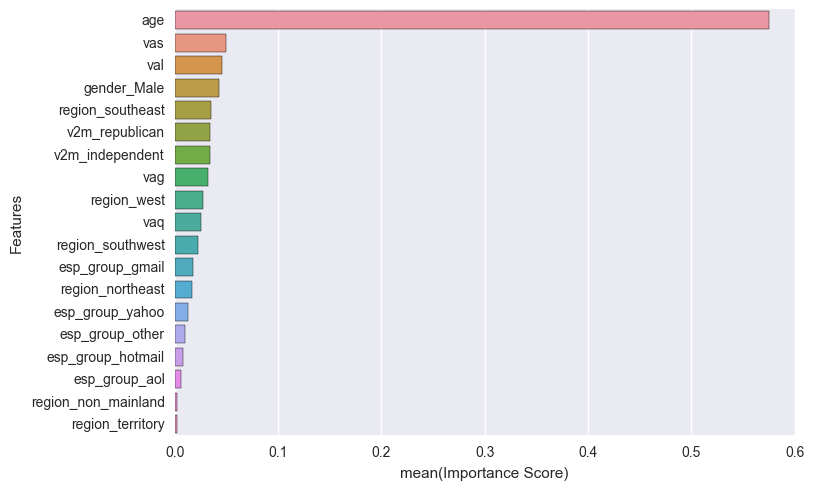

In [193]:
sns.barplot(x='Importance Score', y='Features', data=features_df);

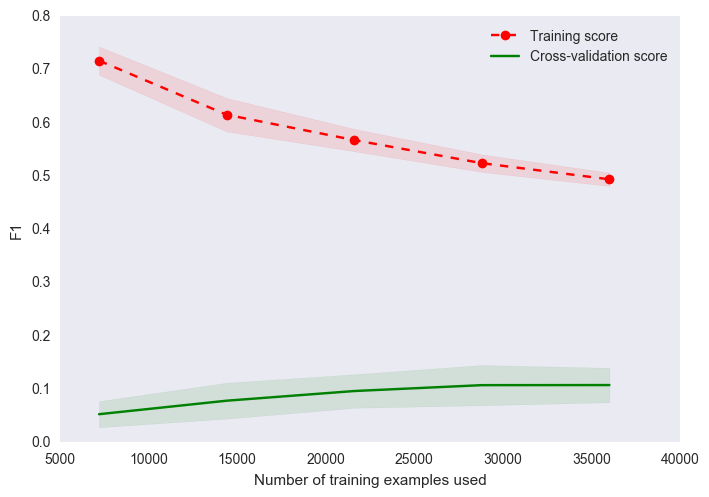

In [122]:
draw_learning_curve(best_model, X_train, y_train, scoring='f1', cv=cv);

#### Model has high bias; will need to obtain more powerful and descriminatory features

In [123]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(penalty = 'l1')

In [124]:
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [125]:
view = pd.DataFrame(X.columns)
coeff = logit.coef_
odds = np.exp(coeff)
coeff = pd.DataFrame(coeff)
odds = pd.DataFrame(odds)

In [126]:
coeff = coeff.transpose()
odds = odds.transpose()

In [127]:
view['coef'] = coeff
view['odds'] = odds
view

,0,coef,odds
0,age,-0.009371,0.990673
1,vag,-0.148700,0.861828
2,val,-0.104619,0.900668
3,vas,0.000000,1.000000
4,vaq,-0.546070,0.579222
5,region_non_mainland,0.000000,1.000000
6,region_northeast,-0.156298,0.855304
7,region_southeast,0.118115,1.125373
8,region_southwest,0.118508,1.125816
9,region_territory,0.000000,1.000000


##### Both Random Forest and logistic regression are identifying esp_group as an unimportant feature

#### b. Dropping esp_group feature

Will use the same steps as before to model the dataset without the feature esp_group

In [128]:
data3 = data.copy()

In [129]:
a = pd.get_dummies(data3['gender'], prefix= 'gender', drop_first= True)
data3 = data3.join(a)

In [130]:
b = pd.get_dummies(data3['region'], prefix= 'region', drop_first= True)
data3 = data3.join(b)

In [131]:
c = pd.get_dummies(data3['v2m'], prefix= 'v2m', drop_first= True)
data3 = data3.join(c)

In [132]:
data3 = data3.drop('esp', axis= 1)
data3 = data3.drop('esp_group', axis= 1)
data3 = data3.drop('state', axis= 1)
data3 = data3.drop('region', axis= 1)
data3 = data3.drop('v2m', axis= 1)
data3 = data3.drop('gender', axis= 1)

In [133]:
X3= data3.drop('CPAWallBuyer', axis=1)
y3= data3['CPAWallBuyer']

In [134]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3)

In [135]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
parameters = {'max_features': ('auto', 'sqrt', 'log2')}
model3 = RandomForestClassifier()
clf3 = GridSearchCV(model3, parameters, cv=cv)

In [136]:
clf3.fit(X3_train, y3_train)
clf3.best_params_

{'max_features': 'auto'}

In [137]:
best_model3 = clf3.best_estimator_

In [138]:
best_model3.fit(X3_train, y3_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [139]:
scores3 = cross_val_score(best_model3, X3_train, y3_train, cv=10, scoring= 'f1')
print('CV accuracy {}, Average accuracy {}'.format(scores3, scores3.mean()))

CV accuracy [ 0.04819277  0.07142857  0.08988764  0.08791209  0.13953488  0.11494253
  0.06976744  0.04761905  0.06976744  0.11363636], Average accuracy 0.0852688778307


In [140]:
y3_predict = best_model3.predict(X3_train)
f1_score(y3_train, y3_predict)

0.27674418604651163

In [179]:
y3_predict = best_model3.predict(X3_test)
f1_score(y3_test, y3_predict)

0.12500000000000003

In [142]:
best_model3.score(X3_test, y3_test)

0.98320671731307474

In [143]:
features3 = X3.columns
feature_importances3 = best_model3.feature_importances_
features_df3 = pd.DataFrame({'Features': features3, 'Importance Score': feature_importances3})
features_df3.sort_values('Importance Score', inplace=True, ascending=False)
features_df3

,Features,Importance Score
0,age,0.663249
3,vas,0.048745
13,v2m_republican,0.045821
12,v2m_independent,0.040454
5,gender_Male,0.038386
1,vag,0.036325
2,val,0.026142
11,region_west,0.023475
8,region_southeast,0.020486
4,vaq,0.018066


##### Removing esp_group resulted in worse performance than including it

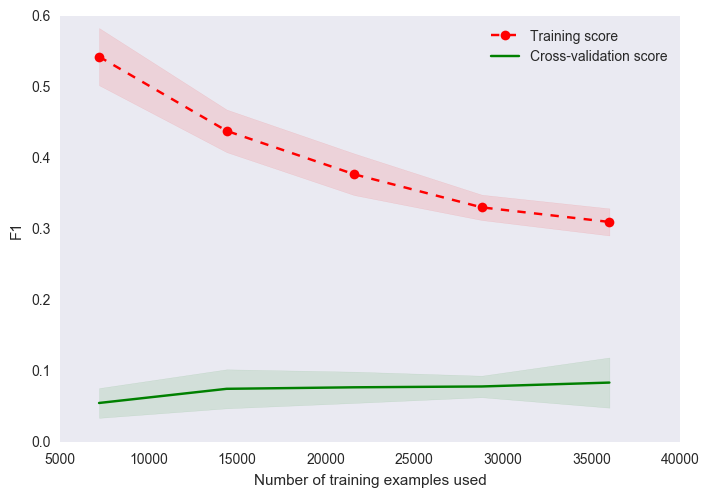

In [144]:
draw_learning_curve(best_model3, X3_train, y3_train, scoring='f1', cv=cv);

Learning curve is showing high bias and underfitting

#### c. Dropping region and esp_group features

In [145]:
data4 = data.copy()

In [146]:
data4.columns

Index([u'age', u'gender', u'state', u'esp', u'vag', u'val', u'vas', u'vaq',
       u'v2m', u'CPAWallBuyer', u'region', u'esp_group'],
      dtype='object')

In [147]:
a2 = pd.get_dummies(data4['gender'], prefix= 'gender', drop_first= True)
data4 = data4.join(a2)

In [148]:
c2 = pd.get_dummies(data4['v2m'], prefix= 'v2m', drop_first= True)
data4 = data4.join(c2)

In [149]:
data4 = data4.drop('esp', axis= 1)
data4 = data4.drop('esp_group', axis= 1)
data4 = data4.drop('state', axis= 1)
data4 = data4.drop('region', axis= 1)
data4 = data4.drop('v2m', axis= 1)
data4 = data4.drop('gender', axis= 1)

In [150]:
X4= data4.drop('CPAWallBuyer', axis=1)
y4= data4['CPAWallBuyer']

In [151]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4)

In [152]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
parameters = {'max_features': ('auto', 'sqrt', 'log2')}
model4 = RandomForestClassifier()
clf4 = GridSearchCV(model4, parameters, cv=cv)

In [153]:
clf4.fit(X4_train, y4_train)
clf4.best_params_

{'max_features': 'sqrt'}

In [154]:
best_model4 = clf4.best_estimator_

In [155]:
best_model4.fit(X4_train, y4_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [156]:
scores4 = cross_val_score(best_model4, X4_train, y4_train, cv=10, scoring= 'f1')
print('CV accuracy {}, Average accuracy {}'.format(scores4, scores4.mean()))

/Users/otaveras/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


CV accuracy [ 0.08108108  0.          0.02631579  0.          0.05333333  0.
  0.02739726  0.07792208  0.          0.        ], Average accuracy 0.0266049542084


In [157]:
y4_predict = best_model4.predict(X4_train)
f1_score(y4_train, y4_predict)

0.050919377652050915

In [158]:
y4_predict_test = best_model4.predict(X4_test)
f1_score(y4_test, y4_predict_test)

0.031496062992125991

In [159]:
features4 = X4.columns
feature_importances4 = best_model4.feature_importances_
features_df4 = pd.DataFrame({'Features': features4, 'Importance Score': feature_importances4})
features_df4.sort_values('Importance Score', inplace=True, ascending=False)
features_df4

,Features,Importance Score
0,age,0.789376
3,vas,0.033208
1,vag,0.032766
4,vaq,0.032416
5,gender_Male,0.031909
2,val,0.031216
7,v2m_republican,0.025976
6,v2m_independent,0.023133


##### Dropping both region and esp_group resulted in even worse performance

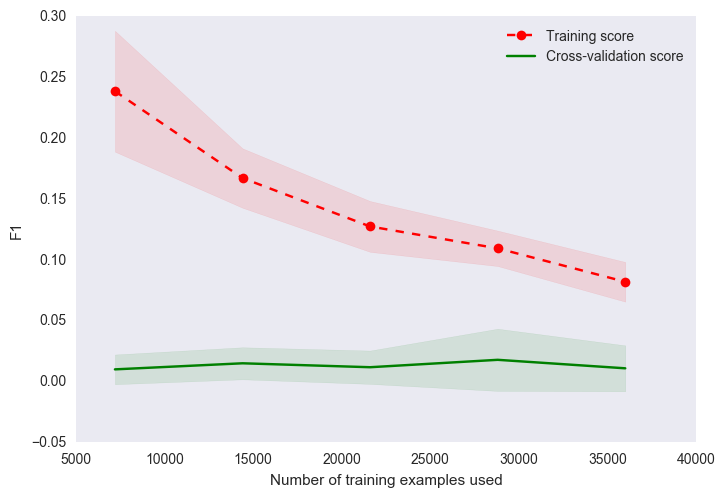

In [180]:
#Dropping region and esp_group
draw_learning_curve(best_model4, X4_train, y4_train, scoring='f1', cv=cv);

Learning curves are still showing high bias; simplest way to deal with bias is to get new features

#### d. Dropping region, esp_group, and v2m

In [161]:
data5 = data.copy()

In [193]:
a5 = pd.get_dummies(data5['gender'], prefix= 'gender', drop_first= True)
data5 = data5.join(a5)

In [162]:
data5 = data5.drop('esp', axis= 1)
data5 = data5.drop('esp_group', axis= 1)
data5 = data5.drop('state', axis= 1)
data5 = data5.drop('region', axis= 1)
data5 = data5.drop('v2m', axis= 1)
data5 = data5.drop('gender', axis= 1)

In [163]:
X5= data5.drop('CPAWallBuyer', axis=1)
y5= data5['CPAWallBuyer']

In [164]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5)

In [165]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
parameters = {'max_features': ('auto', 'sqrt', 'log2')}
model5 = RandomForestClassifier()
clf5 = GridSearchCV(model5, parameters, cv=cv)

In [166]:
clf5.fit(X5_train, y5_train)
clf5.best_params_

{'max_features': 'auto'}

In [167]:
best_model5 = clf5.best_estimator_

In [168]:
best_model5.fit(X5_train, y5_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [169]:
scores5 = cross_val_score(best_model5, X5_train, y5_train, cv=10, scoring= 'f1')
print('CV accuracy {}, Average accuracy {}'.format(scores5, scores5.mean()))

CV accuracy [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.], Average accuracy 0.0


In [170]:
y5_predict = best_model5.predict(X5_train)
f1_score(y5_train, y5_predict)

0.0028248587570621473

In [171]:
y5_predict_test = best_model5.predict(X5_test)
f1_score(y5_test, y5_predict_test)

0.0

In [172]:
features5 = X5.columns
feature_importances5 = best_model5.feature_importances_
features_df5 = pd.DataFrame({'Features': features5, 'Importance Score': feature_importances5})
features_df5.sort_values('Importance Score', inplace=True, ascending=False)
features_df5

,Features,Importance Score
0,age,0.850276
3,vas,0.045091
4,vaq,0.042107
2,val,0.039252
1,vag,0.023274


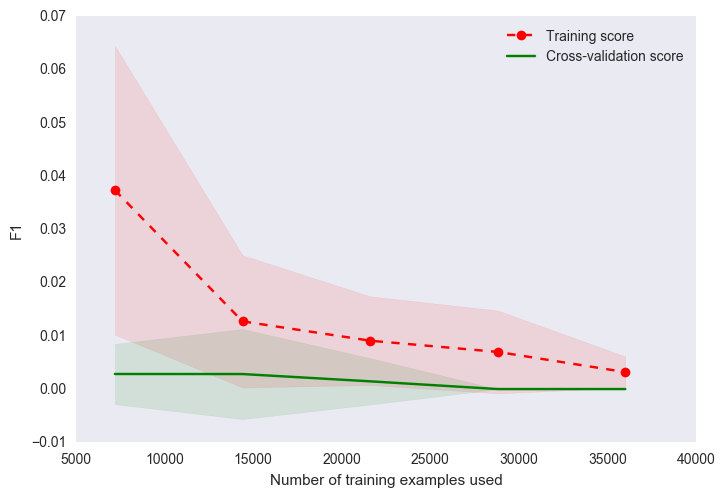

In [173]:
#Dropping region and esp_group
draw_learning_curve(best_model5, X5_train, y5_train, scoring='f1', cv=cv);

##### Dropping region, esp_group, and v2m resulted in a model incapable of making a prediction

#### e. Modelling Summary

The random forest model with all the features (kitchen sink) did not beat the dummy model that would achieve 98.5% accuracy by predicting that every user will not be a buyer. The kitchen sink model, however, was the highest performing model with an f1 score of ~0.185 on the test dataset. After creating learning curves, I learned that the model had high bias and was suffering from underfitting. The simplest way to combat high bias is to get new features- perhaps median household income and employment status. My company's database has user responses to employment status. As for MHI, I can obtain the zipcode of each user and then use U.S. Census data to acquire Median Household Income by zip code.